# Project Description

Suppose you work for the oil company "GlavRosGosNeft". You need to decide where to drill a new well.
You are provided with oil samples from three regions: each has 10,000 fields, with measurements of oil quality and volume of reserves. Build a machine learning model to help determine the region where extraction will yield the highest profit. Analyze potential profit and risks using the Bootstrap technique.

Steps for choosing a location:

 - In the selected region, search for oil fields and determine feature values for each;
 - Build a model and estimate the volume of reserves;
 - Select fields with the highest estimated values. The number of fields depends on the company’s budget and the cost of developing one well;
 - Profit is equal to the total profit from the selected fields.

# 1. Data Loading and Preparation

In [1]:
import pandas as pd
df1 = pd.read_csv('/Users/fidanb/Downloads/yandex praktikum/all datasets/geo_data_0.csv')
df2 = pd.read_csv('/Users/fidanb/Downloads/yandex praktikum/all datasets/geo_data_1.csv')
df3 = pd.read_csv('/Users/fidanb/Downloads/yandex praktikum/all datasets/geo_data_2.csv')

In [2]:
list = [df1,df2,df3]
for df in list:
    print('------------------------------')
    print(df.head())
    print('------------------------------')
    print(df.tail())
    print('------------------------------')
    print(df.info())
    print('------------------------------')
    print(df.describe())

------------------------------
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
------------------------------
          id        f0        f1        f2     product
99995  DLsed  0.971957  0.370953  6.075346  110.744026
99996  QKivN  1.392429 -0.382606  1.273912  122.346843
99997  3rnvd  1.029585  0.018787 -1.348308   64.375443
99998  7kl59  0.998163 -0.528582  1.583869   74.040764
99999  1CWhH  1.764754 -0.266417  5.722849  149.633246
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-n

# 2. Model Training and Evaluation

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import warnings
warnings.filterwarnings('ignore')

In [4]:
lst = [df1,df2,df3]
for frame in lst:
    frame.drop(['id'],axis=1, inplace=True)

In [6]:
y1 = df1['product']
X1 = df1.drop('product', axis=1)

In [7]:
y2 = df2['product']
X2 = df2.drop('product', axis=1)

In [8]:
y3 = df3['product']
X3 = df3.drop('product', axis=1)

In [9]:
# Разделила датасет на обучающую, валидационную
X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1, y1, test_size=0.25, random_state=12345)
X2_train, X2_valid, y2_train, y2_valid = train_test_split(X2, y2, test_size=0.25, random_state=12345)
X3_train, X3_valid, y3_train, y3_valid = train_test_split(X3, y3, test_size=0.25, random_state=12345)

In [10]:
X1_train.shape, y1_train.shape, X1_valid.shape, y1_valid.shape

((75000, 3), (75000,), (25000, 3), (25000,))

In [11]:
X2_train.shape, y2_train.shape, X2_valid.shape, y2_valid.shape

((75000, 3), (75000,), (25000, 3), (25000,))

In [12]:
X3_train.shape, y3_train.shape, X3_valid.shape, y3_valid.shape

((75000, 3), (75000,), (25000, 3), (25000,))

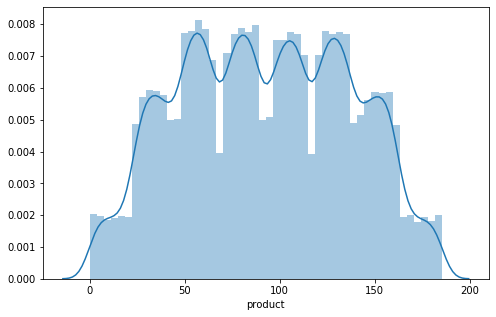

In [13]:
plt.figure(figsize=(8,5))
plt.tight_layout()
seabornInstance.distplot(df1['product'])
plt.show()

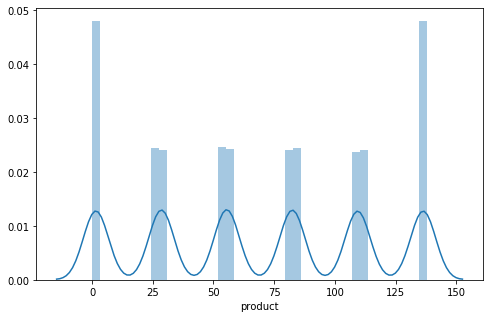

In [14]:
plt.figure(figsize=(8,5))
plt.tight_layout()
seabornInstance.distplot(df2['product'])
plt.show()

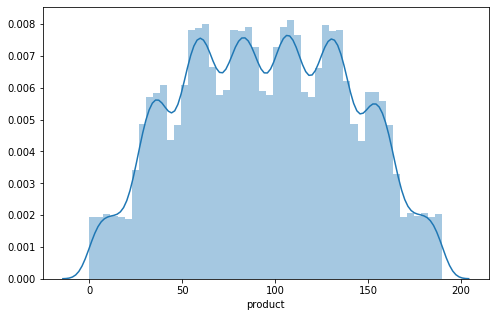

In [15]:
plt.figure(figsize=(8,5))
plt.tight_layout()
seabornInstance.distplot(df3['product'])
plt.show()

In [16]:
model_1 = LinearRegression()
model_2 = LinearRegression()
model_3 = LinearRegression()

In [18]:
model_1.fit(X1_train, y1_train)
model_2.fit(X2_train, y2_train)
model_3.fit(X3_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
predic1 = model_1.predict(X1_valid)
predic2 = model_2.predict(X2_valid)
predic3 = model_3.predict(X3_valid)

In [21]:
len(predic1)

25000

In [451]:
df1_pred = pd.DataFrame({'Actual': y1_valid, 'Predicted': predic1})
df1_pred

,Actual,Predicted
71751,10.038645,95.894952
80493,114.551489,77.572583
2655,132.603635,77.892640
53233,169.072125,90.175134
91141,122.325180,70.510088
...,...,...
12581,170.116726,103.037104
18456,93.632175,85.403255
73035,127.352259,61.509833
63834,99.782700,118.180397


In [452]:
target_1 = df1_pred['Actual']
probabilities_1 = df1_pred['Predicted']

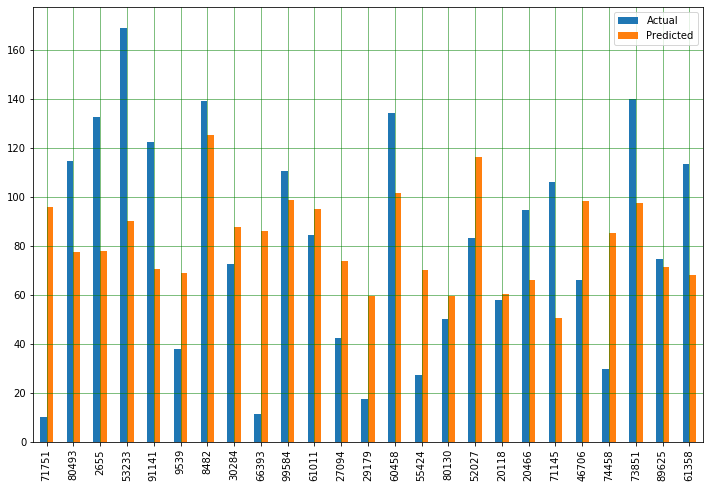

In [453]:
df_1 = df1_pred.head(25)
df_1.plot(kind='bar',figsize=(12,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [454]:
print('Mean:', y1_valid.mean(),',', predic1.mean()) 
print('Mean Absolute Error:', mean_absolute_error(y1_valid, predic1))  
print('Mean Squared Error:', mean_squared_error(y1_valid, predic1))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y1_valid, predic1)))

Mean: 92.07859674082927 , 92.59256778438038
Mean Absolute Error: 30.919600777151313
Mean Squared Error: 1412.2129364399243
Root Mean Squared Error: 37.5794217150813


In [22]:
y1_valid.shape

(25000,)

In [23]:
predic1.shape

(25000,)

In [455]:
df2_pred = pd.DataFrame({'Actual': y2_valid, 'Predicted': predic2})
df2_pred

,Actual,Predicted
71751,80.859783,82.663314
80493,53.906522,54.431786
2655,30.132364,29.748760
53233,53.906522,53.552133
91141,0.000000,1.243856
...,...,...
12581,137.945408,136.869211
18456,110.992147,110.693465
73035,137.945408,137.879341
63834,84.038886,83.761966


In [456]:
target_2 = df2_pred['Actual']
probabilities_2 = df2_pred['Predicted']

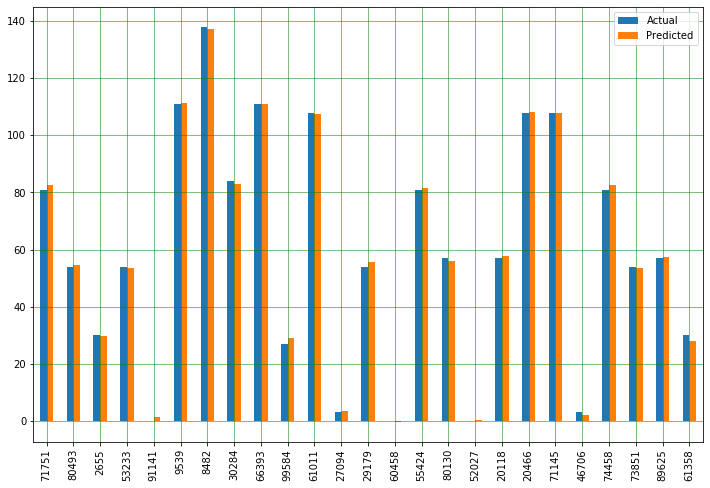

In [457]:
df_2 = df2_pred.head(25)
df_2.plot(kind='bar',figsize=(12,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [458]:
print('Mean:', y2_valid.mean(),',',predic2.mean()) 
print('Mean Absolute Error:', mean_absolute_error(y2_valid, predic2))  
print('Mean Squared Error:', mean_squared_error(y2_valid, predic2))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y2_valid, predic2)))

Mean: 68.72313602435997 , 68.728546895446
Mean Absolute Error: 0.718766244212475
Mean Squared Error: 0.7976263360391139
Root Mean Squared Error: 0.893099286775616


In [459]:
df3_pred = pd.DataFrame({'Actual': y3_valid, 'Predicted': predic3})
df3_pred

,Actual,Predicted
71751,61.212375,93.599633
80493,41.850118,75.105159
2655,57.776581,90.066809
53233,100.053761,105.162375
91141,109.897122,115.303310
...,...,...
12581,28.492402,78.765887
18456,21.431303,95.603394
73035,125.487229,99.407281
63834,99.422903,77.779912


In [460]:
target_3 = df3_pred['Actual']
probabilities_3 = df3_pred['Predicted']

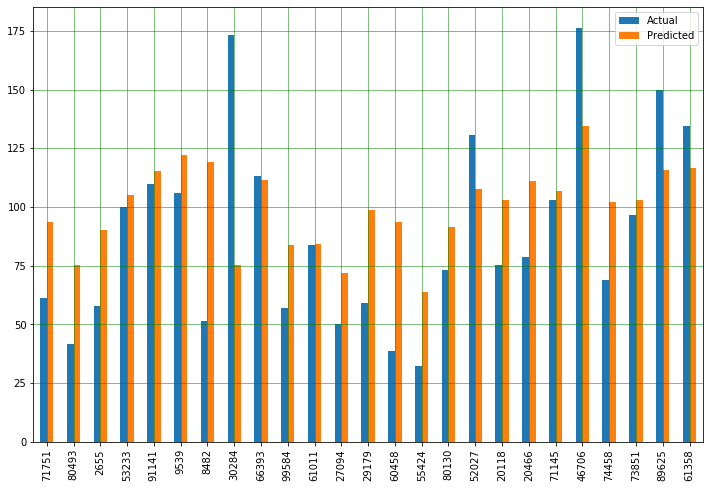

In [461]:
df_3 = df3_pred.head(25)
df_3.plot(kind='bar',figsize=(12,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [462]:
print('Mean:', y3_valid.mean(),',',predic3.mean()) 
print('Mean Absolute Error:', mean_absolute_error(y3_valid, predic3))  
print('Mean Squared Error:', mean_squared_error(y3_valid, predic3))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y3_valid, predic3)))

Mean: 94.88423280885438 , 94.96504596800489
Mean Absolute Error: 32.792652105481814
Mean Squared Error: 1602.3775813236196
Root Mean Squared Error: 40.02970873393434


#### Based on the calculations and model predictions for the three regions, the following conclusions can be made:
 1. The largest oil reserves are located in regions 3 and 1 — the average volume is approximately 95 and 92 thousand barrels, respectively. The model also showed high RMSE values: 40 thousand barrels for region 3 and 37 thousand barrels for region 1, indicating that the model does not predict the reserves very accurately in these regions.
 2. In region 2, the oil reserves are smaller than in the two regions mentioned above — 69 thousand barrels; however, the model's RMSE is close to 0, indicating that the model predicts the oil volumes in this region almost perfectly.

# 3. Preparation for Profit Calculation

In [463]:
n=500
budget = 10000000000
spending = 50000000
one_br_price = 4500

###### Since the budget for developing one region is 10 billion RUB and the price of one barrel is known, we can calculate the required volume of product to be extracted from a region, as well as for each of the 500 surveyed sites.

In [464]:
min_volume_for_region = budget/one_br_price
volume_for_one= min_volume_for_region/n
print('Volume for region:', min_volume_for_region)
print('Volume for 1 object:',volume_for_one)

Volume for region: 2222222.222222222
Volume for 1 object: 4444.444444444444


###### Since the budget for developing one region is 10 billion RUB and the cost of drilling one well is 50 million RUB, we can calculate how many wells our budget can cover in a single region.

In [465]:
min_number = budget/spending
min_number

200.0

In [466]:
def income(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return one_br_price * selected.sum() / 1000000  # Divided by 1 million to avoid multiplying by 1,000 (barrels) 
                                                    # and to get the revenue directly in billions.

# 4. Calculation of Profit and Risks

In [467]:
state = np.random.RandomState(12345)
    
values = []
for i in range(1000):
    target_subsample = target_1.sample(n=n, replace=True, random_state=state)
    probs_subsample = probabilities_1[target_subsample.index]
    values.append(income(target_subsample, probs_subsample, 200))

values_1 = pd.Series(values)
lower_1 = values_1.quantile(0.025)
upper_1 = values_1.quantile(0.975)
mean_1 = values_1.mean()

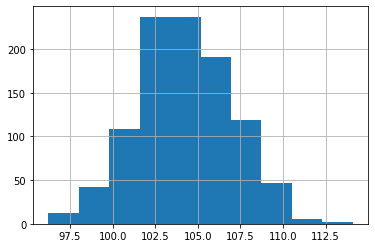

In [468]:
values_1.hist();

In [469]:
print('Mean value of incomes in 1st Region:', mean_1, 'billions Rub')
print('Lower value of inсomes in 1st Region:', lower_1, 'billions Rub')
print('Upper value of inсomes in 1st Region:', upper_1, 'billions Rub')

Mean value of incomes in 1st Region: 104.25938526910593 billions Rub
Lower value of inсomes in 1st Region: 98.97909905162062 billions Rub
Upper value of inсomes in 1st Region: 109.47976353358368 billions Rub


In [470]:
state = np.random.RandomState(12345)
    
values = []
for i in range(1000):
    target_subsample = target_2.sample(n=n, replace=True, random_state=state)
    probs_subsample = probabilities_2[target_subsample.index]
    values.append(income(target_subsample, probs_subsample, 200))

values_2 = pd.Series(values)
lower_2 = values_2.quantile(0.025)
upper_2 = values_2.quantile(0.975)
mean_2 = values_2.mean()

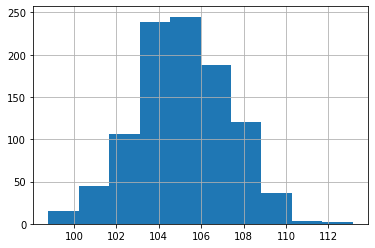

In [471]:
values_2.hist();

In [472]:
print('Mean value of incomes in 2nd Region:', mean_2, 'billions Rub')
print('Lower value of inсomes in 2nd Region:', lower_2, 'billions Rub')
print('Upper value of inсomes in 2nd Region:', upper_2, 'billions Rub')

Mean value of incomes in 2nd Region: 105.1522277344329 billions Rub
Lower value of inсomes in 2nd Region: 100.68873225370501 billions Rub
Upper value of inсomes in 2nd Region: 109.3154759125705 billions Rub


In [473]:
state = np.random.RandomState(12345)
    
values = []
for i in range(1000):
    target_subsample = target_3.sample(n=n, replace=True, random_state=state)
    probs_subsample = probabilities_3[target_subsample.index]
    values.append(income(target_subsample, probs_subsample, 200))

values_3 = pd.Series(values)
lower_3 = values_3.quantile(0.025)
upper_3 = values_3.quantile(0.975)
mean_3 = values_3.mean()

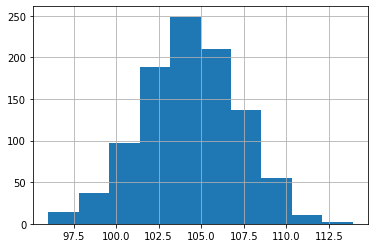

In [474]:
values_3.hist();

In [475]:
print('Mean value of incomes in 3rd Region:', mean_3, 'billions Rub')
print('Lower value of insomes in 3rd Region:', lower_3, 'billions Rub')
print('Upper value of insomes in 3rd Region:', upper_3, 'billions Rub')

Mean value of incomes in 3rd Region: 104.35008362782756 billions Rub
Lower value of insomes in 3rd Region: 98.71119452670212 billions Rub
Upper value of insomes in 3rd Region: 109.69706954180266 billions Rub


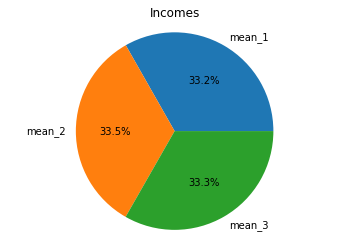

In [476]:
mean_income=[mean_1,mean_2,mean_3]
mean_income = pd.Series(mean_income)
labels='mean_1','mean_2','mean_3'
plt.pie(mean_income,labels=labels,autopct='%1.1f%%')
plt.title('Incomes')
plt.axis('equal')
plt.show()

##### Although the graph shows that revenue distribution across the three regions is almost equal, the second region is the most profitable, with a difference of approximately 1 billion rubles.

In [477]:
ROI_1 = (mean_1*1000000000 - budget) / budget* 100
ROI_2 = (mean_2*1000000000  - budget) / budget* 100
ROI_3 = (mean_3*1000000000  - budget) / budget* 100
print('ROI_1:',ROI_1)
print('ROI_2:',ROI_2)
print('ROI_3:',ROI_3)

ROI_1: 942.5938526910592
ROI_2: 951.5222773443289
ROI_3: 943.5008362782756


##### I calculated the risks using "Return on Investment" — all indicators turned out very high, with payback reaching nearly 940–950%, which suggests that the risks are effectively zero.